In [4]:
import tensorflow as tf
from  keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.models import load_model

In [5]:
#input_folder = "PlantVillage"
#output = "Split"
#splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.75, .25)) 

In [6]:
train_datagen = ImageDataGenerator(
        rescale=1./255, #feature scaling
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

training_set = train_datagen.flow_from_directory(
        'Split/train', #path in our root folder
        target_size=(64, 64), #higher is computationally expensive
        batch_size=32,
        class_mode='categorical') 

Found 11995 images belonging to 10 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale=1./255) #scaling
#no other transformations because we might get bad pictures to be predicted

test_set = test_datagen.flow_from_directory(
        'Split/val',
        target_size=(64, 64), #has to be same as training set
        batch_size=32,
        class_mode='categorical')

Found 4006 images belonging to 10 classes.


In [8]:
"""cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
cnn.add(Dropout(0.3))
cnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
cnn.add(Dropout(0.2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units = 512, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
cnn.add(Dropout(0.2))"""

"cnn = tf.keras.models.Sequential()\ncnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64,64,3]))\ncnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))\ncnn.add(tf.keras.layers.BatchNormalization())\ncnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))\ncnn.add(Dropout(0.3))\ncnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size = 3, activation = 'relu'))\ncnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size = 3, activation = 'relu'))\ncnn.add(tf.keras.layers.BatchNormalization())\ncnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))\ncnn.add(Dropout(0.2))\n\ncnn.add(tf.keras.layers.Flatten())\n\ncnn.add(tf.keras.layers.Dense(units = 512, activation = 'relu'))\ncnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))\ncnn.add(Dropout(0.2))"

In [9]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
cnn.add(Dropout(0.3))
#second convolution layer
cnn.add(tf.keras.layers.Conv2D(filters=32 , kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
cnn.add(Dropout(0.3))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
cnn.add(Dropout(0.3))

In [10]:
cnn.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))

In [11]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [12]:
#compiling the cnn
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [13]:
from keras.callbacks import History
hist = History()
cnn.fit(x = training_set, validation_data = test_set, epochs = 25, callbacks=[hist]) # callbacks=[history] for graphs

Epoch 1/25
375/375 [==============================] - 45s 120ms/step - loss: 1.5484 - accuracy: 0.4564 - val_loss: 0.9758 - val_accuracy: 0.6458
Epoch 2/25
375/375 [==============================] - 50s 133ms/step - loss: 0.9059 - accuracy: 0.6883 - val_loss: 0.9513 - val_accuracy: 0.6550
Epoch 3/25
375/375 [==============================] - 45s 121ms/step - loss: 0.7288 - accuracy: 0.7490 - val_loss: 0.6156 - val_accuracy: 0.7846
Epoch 4/25
375/375 [==============================] - 47s 125ms/step - loss: 0.6431 - accuracy: 0.7809 - val_loss: 0.6795 - val_accuracy: 0.7716
Epoch 5/25
375/375 [==============================] - 45s 119ms/step - loss: 0.5716 - accuracy: 0.8023 - val_loss: 0.6445 - val_accuracy: 0.7923
Epoch 6/25
375/375 [==============================] - 46s 124ms/step - loss: 0.5455 - accuracy: 0.8138 - val_loss: 0.7474 - val_accuracy: 0.7501
Epoch 7/25
375/375 [==============================] - 48s 129ms/step - loss: 0.5013 - accuracy: 0.8250 - val_loss: 0.6449 - val_ac

In [14]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


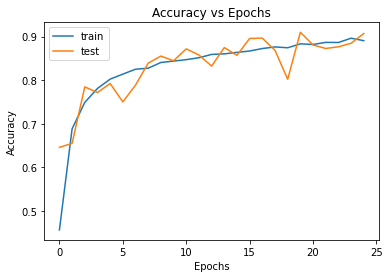

In [15]:
import matplotlib.pyplot as plt
#using hist for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

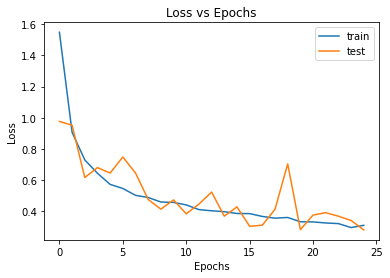

In [16]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'])
plt.show()

In [21]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('Split/indi_test/Tomato_Early_blight.JPG', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
print(result)
training_set.class_indices

if result[0][0] == 1:
  prediction = 'target spot'
elif result[0][1] == 1:
  prediction = 'mosaic'
elif result[0][2] == 1:
  prediction = 'curl virus'
elif result[0][3] == 1:
  prediction = 'bacterial spot'
elif result[0][4] == 1:
  prediction = 'early blight'
elif result[0][5] == 1:
  prediction = 'healthy'
elif result[0][6] == 1:
  prediction = 'late blight'
elif result[0][7] == 1:
  prediction = 'leaf mold'
elif result[0][8] == 1:
  prediction = 'septoria leaf spot'
elif result[0][9] == 1:
  prediction = 'spider mites'

print(prediction)

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
early blight


In [18]:
"""cnn.save_weights('final.h5')
cnn.save('Multiclass_classification.h5')"""
#to load
#cnn = load_model('Multiclass_classification.h5')
#cnn.load_weights('final.h5')